In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,  MaxPooling2D,  Activation, Dense, Flatten, Dropout
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import files




# 
# from keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [3]:
train_df = pd.read_csv("https://github.com/arsyadCode/TuRu-ML_CC/blob/main/ML/dataset1/sign_mnist_train.csv?raw=true")
test_df = pd.read_csv("https://github.com/arsyadCode/TuRu-ML_CC/blob/main/ML/dataset1/sign_mnist_test.csv?raw=true")

In [4]:
#Datasets as numpy arrays
train_data = np.array(train_df , dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [5]:
#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


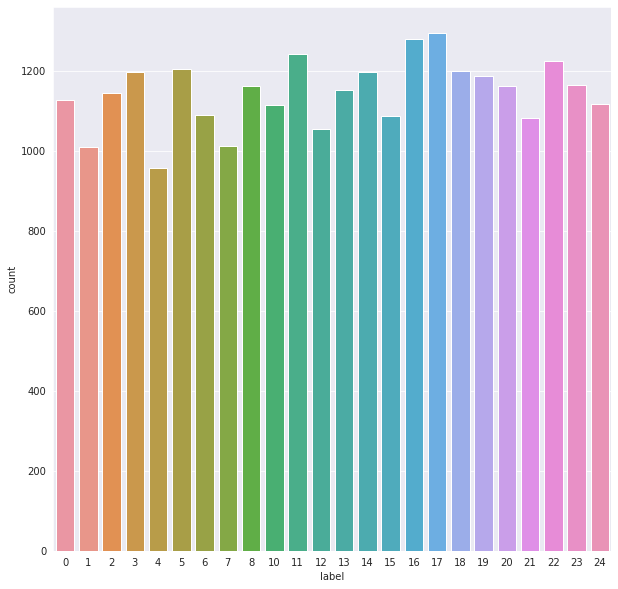

In [6]:
import seaborn as sns
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [137]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

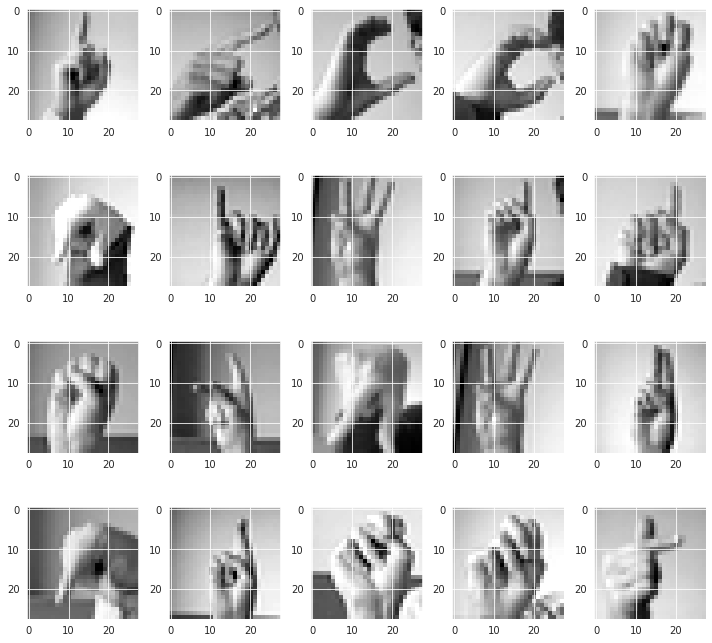

In [8]:
f, ax = plt.subplots(4,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()  

In [9]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False,   
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [10]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [138]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

In [14]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [15]:
from datetime import datetime 
batch_size=16
start1 = datetime.now() 
history = model.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,
                    epochs = 50 , validation_data = (X_test, y_test_cat) , 
                    callbacks = [learning_rate_reduction])

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

Epoch 1/50
215/215 [==============================] - 21s 36ms/step - loss: 2.9152 - accuracy: 0.1198 - val_loss: 2.0870 - val_accuracy: 0.3505 - lr: 0.0010
Epoch 2/50
215/215 [==============================] - 7s 34ms/step - loss: 1.8637 - accuracy: 0.4018 - val_loss: 1.2236 - val_accuracy: 0.5626 - lr: 0.0010
Epoch 3/50
215/215 [==============================] - 7s 33ms/step - loss: 1.2881 - accuracy: 0.5682 - val_loss: 0.7586 - val_accuracy: 0.7398 - lr: 0.0010
Epoch 4/50
215/215 [==============================] - 7s 34ms/step - loss: 1.0235 - accuracy: 0.6516 - val_loss: 0.5897 - val_accuracy: 0.7957 - lr: 0.0010
Epoch 5/50
215/215 [==============================] - 7s 34ms/step - loss: 0.8502 - accuracy: 0.7069 - val_loss: 0.4356 - val_accuracy: 0.8546 - lr: 0.0010
Epoch 6/50
215/215 [==============================] - 7s 33ms/step - loss: 0.7234 - accuracy: 0.7530 - val_loss: 0.3202 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 7/50
215/215 [==============================] - 7s 34ms/s

In [16]:
print("Accuracy of the model is - " , model.evaluate(X_test, y_test_cat)[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9930
Accuracy of the model is -  99.3028461933136 %


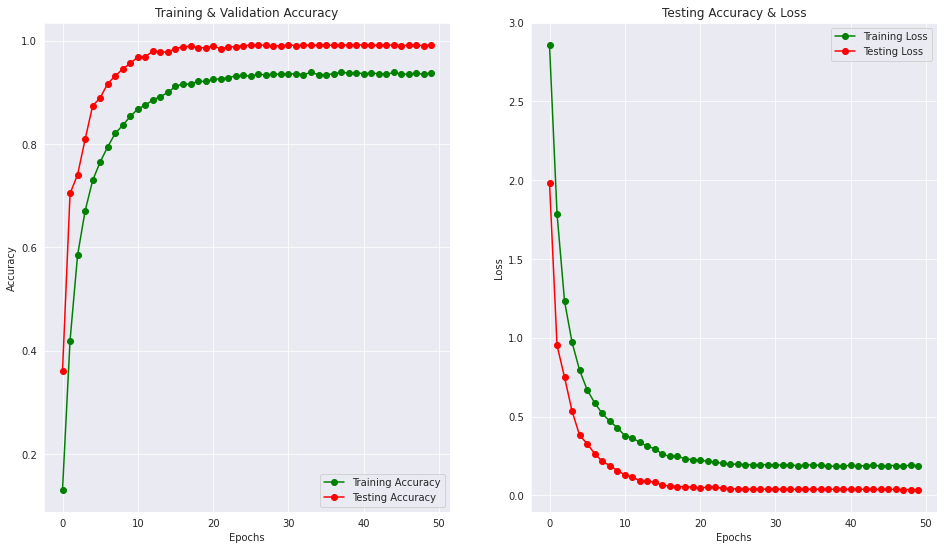

In [16]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

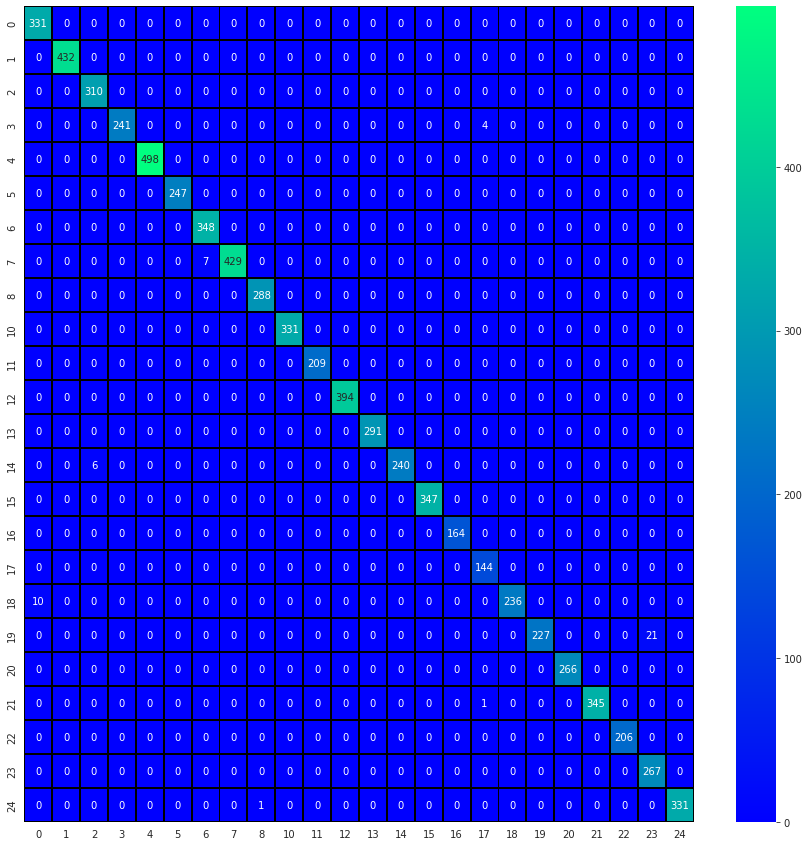

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

prediction=model.predict(X_test) 
y = test_df['label']
predictions=np.argmax(prediction,axis=1)
cm = confusion_matrix( y,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "winter", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

Predicted Label:  P
True Label:  P


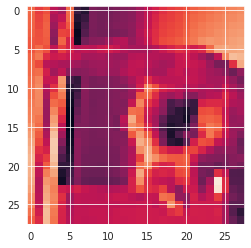

In [19]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(predictions[i])])
print("True Label: ", class_names[int(y_test[i])])


In [139]:
def getImage(path):
    img = image.load_img(path, target_size=(28,28))
    # imgplot = plt.imshow(img)
    img.save("new_image.jpg")
 
    # print(model.predict(images))

In [123]:
test = files.upload()

Saving test-C.jpg to test-C.jpg


In [140]:
getImage("test-C.jpg")

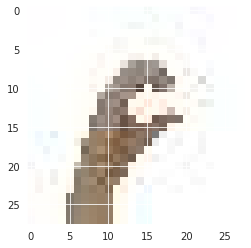

In [141]:
img = image.load_img("new_image.jpg")
plt.imshow(img)

In [79]:
import cv2
def rgb_to_gray_prep_pred(path_pred):
    RGB_image = cv2.imread(path_pred, cv2.IMREAD_UNCHANGED)
    blue = RGB_image[:,:,0]
    green = RGB_image[:,:,1]
    red = RGB_image[:,:,2]
    Average_Gray = blue/3+green/3+red/3
    Weighted_Gray = (0 * blue) + (0* green) + (1 * red)
    prep_Weighted_Gray = Weighted_Gray/255.
    img = np.expand_dims(prep_Weighted_Gray,axis=-1)
    img = np.expand_dims(img,axis=0)
    
 
# resize imagei
  
    print(img.shape)
   
    
    return img

In [142]:
prediction = model.predict(rgb_to_gray_prep_pred("new_image.jpg"))
predictions=np.argmax(prediction,axis=1)
predictions
class_names[int(predictions)]
# class_names[predictions]

(1, 28, 28, 1)


'L'

#BATASSSS

In [94]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [100]:
def img_prep_predict(path):
    img = load_img(path, target_size=(28, 28))
    img = img_to_array(img)
    img=tf.expand_dims(img,axis=0)
    img = img/255.
    return img

In [43]:
from PIL import Image
img = Image.open('/content/asl-a-new.jpg').convert('L')
img.save('greyscale.png')

FileNotFoundError: ignored

In [42]:
img_preprocessed = img_prep_predict("/content/greyscale.png")
img_preprocessed.shape

NameError: ignored

NotFoundError: ignored